In [2]:
!pip list
!pip show transformer

Package                       Version
----------------------------- ----------------------------
absl-py                       1.2.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.

In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 7.4 MB/s 
     |████████████████████████████████| 101 kB 9.2 MB/s 
     |████████████████████████████████| 6.6 MB 53.2 MB/s 
     |████████████████████████████████| 596 kB 72.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup 
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import re
import requests
import logging
from datetime import datetime

In [31]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [15]:
headers = {
    "authority": "www.amazon.com",
    "pragma": "no-cache",
    "cache-control": "no-cache",
    "dnt": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "sec-fetch-site": "none",
    "sec-fetch-mode": "navigate",
    "sec-fetch-dest": "document",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
}

URLS = [
 "https://www.amazon.in/Xbox-Series-X/product-reviews/B08J7QX1N1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
]


def get_page_html(page_url: str) -> str:
    resp = requests.get(page_url, headers=headers)
    return resp.text


def get_reviews_from_html(page_html: str) -> BeautifulSoup:
    soup = BeautifulSoup(page_html, "lxml")
    reviews = soup.find_all("div", {"class": "a-section celwidget"})
    return reviews


def get_review_date(soup_object: BeautifulSoup):
    date_string = soup_object.find("span", {"class": "review-date"}).get_text()
    return date_string


def get_review_text(soup_object: BeautifulSoup) -> str:
    review_text = soup_object.find(
        "span", {"class": "a-size-base review-text review-text-content"}
    ).get_text()
    return review_text.strip()


def get_review_header(soup_object: BeautifulSoup) -> str:
    review_header = soup_object.find(
        "a",
        {
            "class": "a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold"
        },
    ).get_text()
    return review_header.strip()


def get_number_stars(soup_object: BeautifulSoup) -> str:
    stars = soup_object.find("span", {"class": "a-icon-alt"}).get_text()
    return stars.strip()


def get_product_name(soup_object: BeautifulSoup) -> str:
    product = soup_object.find(
        "a", {"class": "a-link-normal"}
    ).get_text()
    return product.strip()


def orchestrate_data_gathering(single_review: BeautifulSoup) -> dict:
    return {
        "review_text": get_review_text(single_review),
        "review_date": get_review_date(single_review),
        "review_title": get_review_header(single_review),
        "review_stars": get_number_stars(single_review),
        "review_flavor": get_product_name(single_review),
    }


if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    all_results = []

    for u in URLS:
        logging.info(u)
        html = get_page_html(u)
        reviews = get_reviews_from_html(html)
        for rev in reviews:
            data = orchestrate_data_gathering(rev)
            all_results.append(data)

    out = pd.DataFrame.from_records(all_results)
    logging.info(f"{out.shape[0]} Is the shape of the dataframe")
    save_name = f"{datetime.now().strftime('%Y-%m-%d-%m')}.csv"
    logging.info(f"saving to {save_name}")
    out.to_csv(save_name)
    logging.info('Done yayy')

INFO:root:https://www.amazon.in/Xbox-Series-X/product-reviews/B08J7QX1N1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:10 Is the shape of the dataframe
INFO:root:saving to 2022-08-06-08.csv
INFO:root:Done yayy


In [16]:
df=pd.read_csv("/content/2022-08-06-08.csv")

In [18]:
df.head()

,Unnamed: 0,review_text,review_date,review_title,review_stars,review_flavor
0,0,This will be aswome and will submit a review w...,Reviewed in India on 22 September 2020,Thanks Amazon. Really glad India is included i...,5.0 out of 5 stars,5.0 out of 5 stars
1,1,The media could not be loaded.\n ...,Reviewed in India on 11 November 2020,A well needed and appreciated upgrade from las...,5.0 out of 5 stars,5.0 out of 5 stars
2,2,The Xbox series X is the most powerful console...,Reviewed in India on 10 November 2020,Games are the only thing that matters.,4.0 out of 5 stars,4.0 out of 5 stars
3,3,Worst console ever. Dont buy it. Go for PS5.It...,Reviewed in India on 22 September 2020,Worst product,1.0 out of 5 stars,1.0 out of 5 stars
4,4,If you are a middle class person and want to e...,Reviewed in India on 12 November 2020,GAMEPASS IS THE FUTURE OF GAMING!!,5.0 out of 5 stars,5.0 out of 5 stars


In [28]:
len(df.columns)

6

In [20]:
df['review_text'][0]

'This will be aswome and will submit a review when i get it. Thanks Amaon for stocking it in India..'

In [46]:
def sentiment_score(review):
  tokens = tokenizer.encode(review,return_tensors="pt")
  result = model(tokens)
  return int(torch.argmax(result.logits))+1

In [37]:
df['review_text'][3]

"Worst console ever. Dont buy it. Go for PS5.It won't win the war definitelyDon't buy any product in pre orders even if you are rich or want to review a product."

In [47]:
sentiment_score(df['review_text'].iloc[3])

1

In [48]:
df['sentiment'] = df['review_text'].apply(lambda x: sentiment_score(x[:512]))

In [133]:
df['extra']=df['review_stars'].apply(lambda x : x[0:3])
df["extra"].astype(float)

0    5.0
1    5.0
2    4.0
3    1.0
4    5.0
5    5.0
6    5.0
7    5.0
8    5.0
9    5.0
Name: extra, dtype: float64

In [129]:
df['sentiment'].astype(int)

0    5
1    2
2    2
3    1
4    3
5    5
6    4
7    5
8    3
9    5
Name: sentiment, dtype: int64

In [127]:
df.columns

Index(['Unnamed: 0', 'review_text', 'review_date', 'review_title',
       'review_stars', 'review_flavor', 'sentiment', 'extra'],
      dtype='object')

,extra
0,5
1,5
2,4
3,1
4,5
5,5
6,5
7,5
8,5
9,5


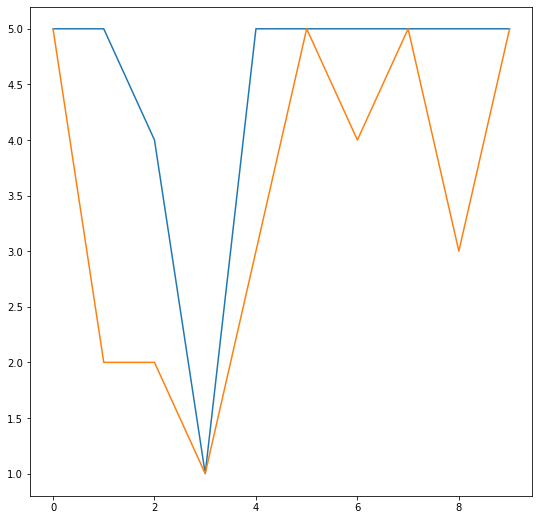

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
plt.plot(df.iloc[:,[-1]].astype(float).astype(int))
plt.plot(df['sentiment'])
plt.show()


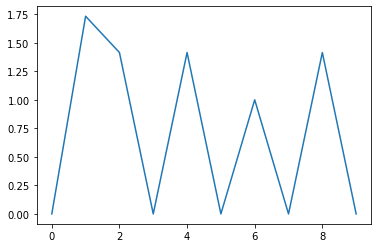

In [165]:
import math
a1 = [x for x in df['extra'].astype(float).astype(int)]
a2 =  [x for x in df['sentiment']]

error=[]
for x,y in zip(a1,a2):
  error.append(math.sqrt(x - y))
plt.plot(error)
plt.show()

In [167]:
sum(error)/len(error)

0.6974691494688162